In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

First I will try it on the biggest field of view and then I will query the found result for subsets of it

In [2]:
f = 8.3e9
l = (c := 299_792_458) / f
D = 13.5
theta = 1.22 * l / D ; radius = theta * 180 / np.pi / 2

In [3]:
f"θ_FOV = {theta * 180 / np.pi * 60 :.2f} arcminutes"

'θ_FOV = 11.22 arcminutes'

In [4]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from targetexplore.targets import Targets

# Galactic Center in galactic coords
gc_gal = SkyCoord(l=0*u.deg, b=0*u.deg, frame='galactic')

In [5]:
radius = 6 # arcminutes (fov 12 arcminutes)

In [6]:
tgts = Targets(gc_gal, radius)

INFO: Query finished. [astroquery.utils.tap.core]


In [7]:
print(tgts.skycoord)

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.42638215, -29.02993261), (266.4325227 , -29.03140179),
     (266.42208923, -29.03366426), ..., (266.37345062, -28.84340468),
     (266.3680796 , -28.84823325), (266.39403076, -28.8404531 )]>


/datax/users/obs/osea/seticore/python/targetexplore/_utils/conversion.py:6: RuntimeWarning: divide by zero encountered in divide
  return c / (D * theta_FOV / 1.22) / 1e9


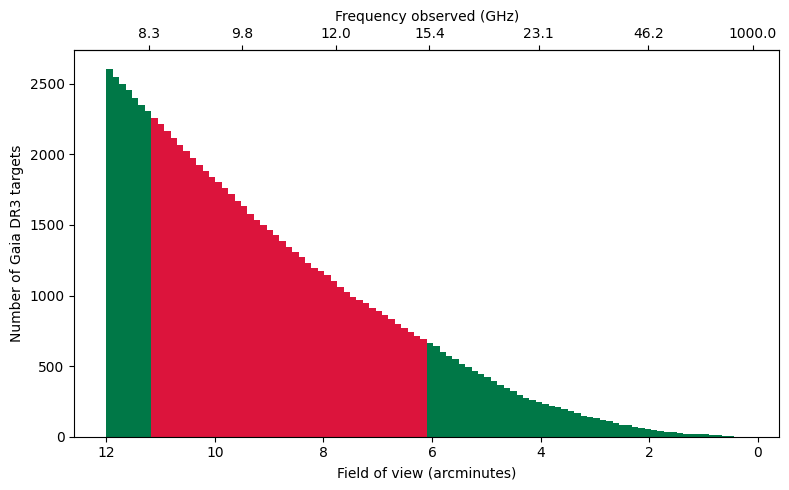

In [8]:
tgts.hist_separation(highlight=True, telescope="MeerKAT", band="5b")

Red marks MeerKAT's band 5b fields of view

## Distance estimates

<Axes: >

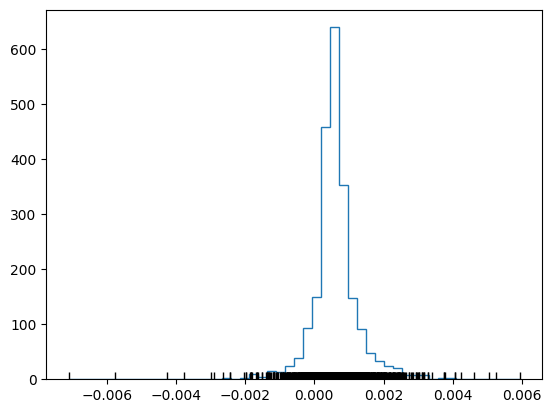

In [9]:
tgts.hist_parallax()

In [26]:
tgts.hist_dist()

AttributeError: 'Targets' object has no attribute 'hist_dist'

(<Axes: title={'center': 'Hertzsprung–Russell Diagram'}, xlabel='BP − RP', ylabel='Absolute G magnitude (M_G)'>,
 <Figure size 1400x600 with 4 Axes>,
 array([<Axes: title={'center': 'HR using naive distance'}, xlabel='BP - RP', ylabel='Absolute G magnitude'>,
        <Axes: title={'center': 'HR using bayesian calculated distance'}, xlabel='BP - RP'>],
       dtype=object))

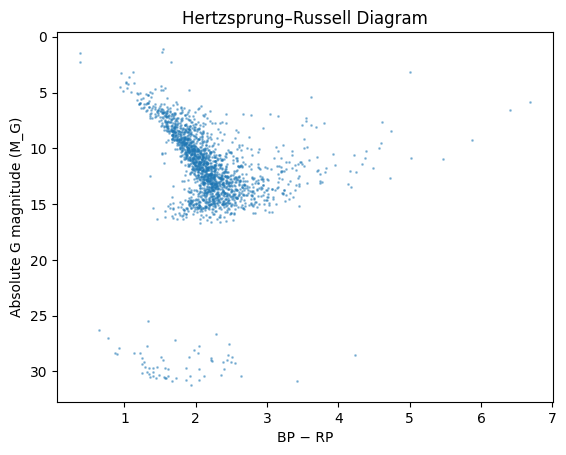

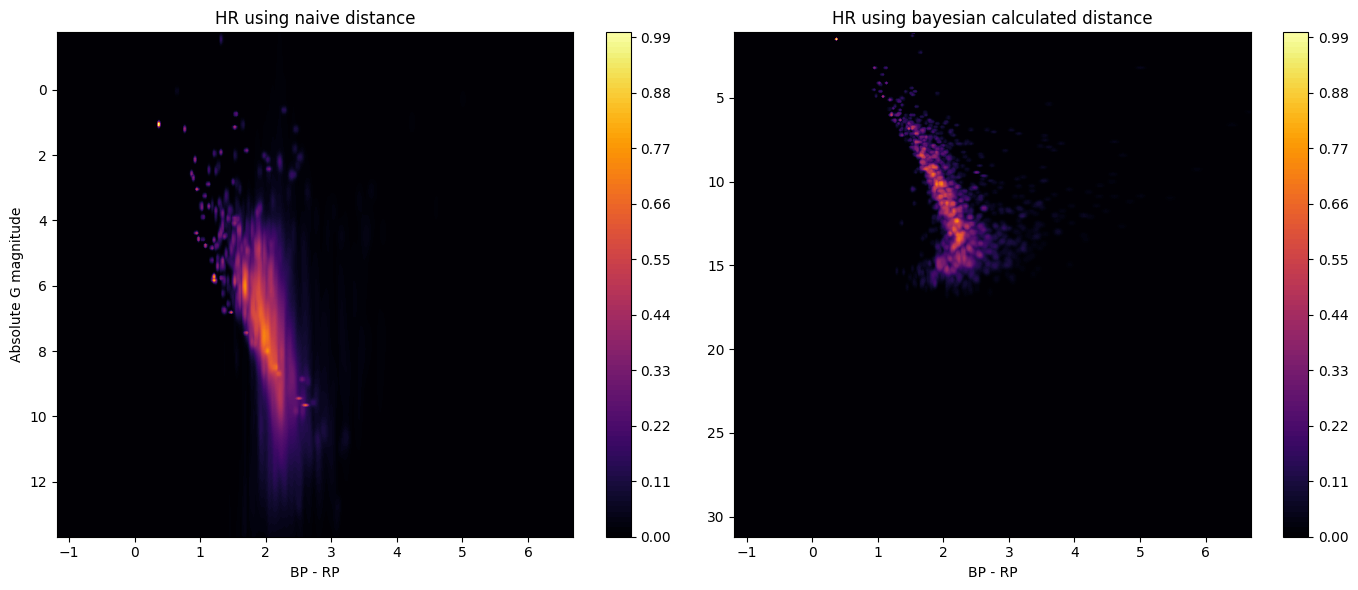

In [19]:
tgts.hr(mask_parallax=True, heatmap=True, naive=False)